<a href="https://colab.research.google.com/github/ernynany/100DaysOfML/blob/main/InnoBioDiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
from scipy import stats

In [114]:
# Load the data into a pandas DataFrame
df = pd.read_excel('/content/sample.xlsx')

In [115]:
# Drop the 'Plant' and 'Species' columns
df = df.drop(['Plant'], axis=1)

# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Convert the DataFrame to a string and print it
#print(df.to_string(index=False))

In [116]:
# Load the data into a pandas DataFrame
mayz_df = pd.read_excel('/content/sample_zeamays.xlsx')

In [117]:
# Drop the 'Plant' and 'Species' columns
mayz_df = mayz_df.drop(['Plant'], axis=1)

# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Convert the DataFrame to a string and print it
print(mayz_df.to_string(index=False))

 Length  Surface Area  Average Diameter  Length per Volume  Root Volume  Species   Group
8139830       1131351            0.4424            8139830        1.251 Zea mays control
8432281       1357606            0.5125            8432281        1.739 Zea mays control
9288293       1504561            0.5156            9288293        1.939 Zea mays control
5034622       1041756            0.6586            5034622        1.715 Zea mays control
4458692        978024            0.6982            4458692        1.707 Zea mays control
8224898       1379256            0.5338            8224898        1.841 Zea mays control
5325013       1009337            0.6033            5325013        1.522 Zea mays     WD2
7166347       1121542            0.4982            7166347        1.397 Zea mays     WD2
7192868       1333946            0.5903            7192868        1.969 Zea mays     WD2
5928487        968186            0.5198            5928487        1.258 Zea mays     WD2
7096406       1348511

Get summary statistics of the data for each group, including the count, mean, standard deviation, minimum, maximum, and quartiles.

In [118]:
# Group the DataFrame by the "Group" column and calculate the desired statistics
group_stats = mayz_df.groupby('Group').agg({'Length': ['mean', 'std', 'min', 'max'],
                                       'Surface Area': ['mean', 'std', 'min', 'max'],
                                       'Average Diameter': ['mean', 'std', 'min', 'max'],
                                       'Length per Volume': ['mean', 'std', 'min', 'max'],
                                       'Root Volume': ['mean', 'std', 'min', 'max']})
# Print the resulting statistics
print(group_stats)


               Length                                  Surface Area  \
                 mean           std      min      max          mean   
Group                                                                 
WD1      6.246320e+06  2.104686e+06  3956284  9641573  1.373568e+06   
WD2      6.573682e+06  7.757199e+05  5325013  7192868  1.167704e+06   
control  7.263103e+06  1.999646e+06  4458692  9288293  1.232092e+06   

                                        Average Diameter                    \
                   std     min      max             mean       std     min   
Group                                                                        
WD1      359890.936266  962375  1947222         0.714417  0.059019  0.6429   
WD2      161613.763689  968186  1348511         0.565917  0.045597  0.4982   
control  210986.944455  978024  1504561         0.560183  0.097534  0.4424   

                Length per Volume                                 Root Volume  \
            max        

In [119]:
# Group the data frame by the 'Group' column and calculate the mean values
group_mean = mayz_df.groupby('Group').mean()

# Print the mean values
#print(group_mean)
print(group_mean.to_string(index=True))

               Length  Surface Area  Average Diameter  Length per Volume  Root Volume
Group                                                                                
WD1      6.246320e+06  1.373568e+06          0.714417       6.246320e+06     2.417333
WD2      6.573682e+06  1.167704e+06          0.565917       6.573682e+06     1.659667
control  7.263103e+06  1.232092e+06          0.560183       7.263103e+06     1.698667


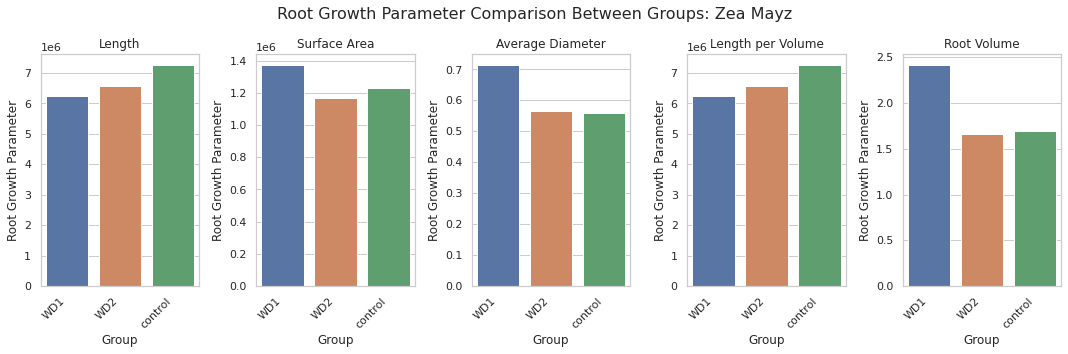

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# set style
sns.set(style='whitegrid')

# create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

# loop over columns and plot bar chart
for ax, col in zip(axes, group_mean.columns):
    col_data = group_mean[col]
    sns.barplot(x=col_data.index, y=col_data, ax=ax, capsize=5)
    ax.set_title(col)
    ax.set_ylabel('Root Growth Parameter')
    ax.set_xticklabels(col_data.index, rotation=45, ha='right')

# set main title
plt.suptitle('Root Growth Parameter Comparison Between Groups: Zea Mayz', fontsize=16)

# adjust layout and padding
plt.tight_layout()
plt.subplots_adjust(top=0.85)

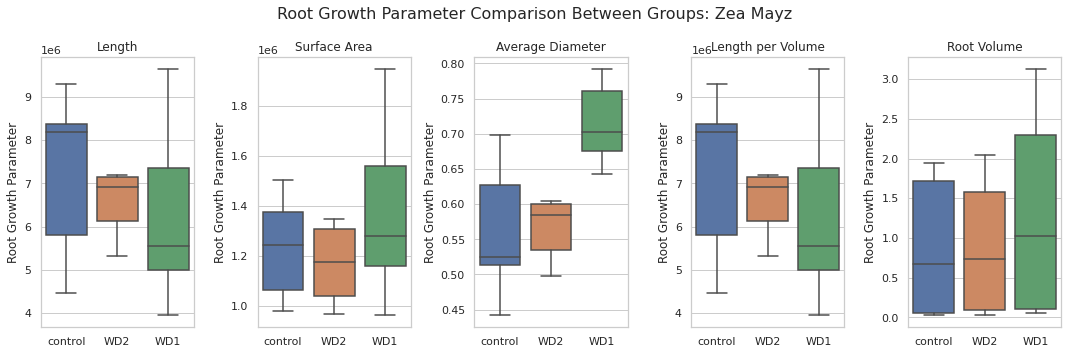

In [124]:
# compare the root parameters with subplot
sns.set(style='whitegrid')

# Create the boxplots for each parameter separated by groups
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
sns.boxplot(x='Group', y='Length', data=mayz_df, ax=axes[0])
sns.boxplot(x='Group', y='Surface Area', data=mayz_df, ax=axes[1])
sns.boxplot(x='Group', y='Average Diameter', data=mayz_df, ax=axes[2])
sns.boxplot(x='Group', y='Length per Volume', data=mayz_df, ax=axes[3])
sns.boxplot(x='Group', y='Root Volume', data=df, ax=axes[4])

# Set the titles and axis labels
titles = ['Length', 'Surface Area', 'Average Diameter', 'Length per Volume', 'Root Volume']
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Root Growth Parameter')

# Set the title for the whole plot
plt.suptitle('Root Growth Parameter Comparison Between Groups: Zea Mayz', fontsize=16)
# adjust layout and padding
plt.tight_layout()

# Let's consider the A. thaliana

In [102]:
# Load the data into a pandas DataFrame
thaliana_df = pd.read_excel('/content/sample_thaliana.xlsx')

In [103]:
# Drop the 'Plant' and 'Species' columns
thaliana_df = thaliana_df.drop(['Plant'], axis=1)

# Set the display options to show all rows
pd.set_option('display.max_rows', None)

# Convert the DataFrame to a string and print it
print(thaliana_df.to_string(index=False))

 Length  Surface Area  Average Diameter  Length per Volume  Root Volume     Species   Group
1055580         84634            0.2552            1055580        0.054 A. thaliana control
 766491         52597            0.2184             766491        0.029 A. thaliana control
1076101         74603            0.2207            1076101        0.041 A. thaliana control
 810314         71251            0.2799             810314        0.050 A. thaliana control
1619310        136680            0.2687            1619310        0.092 A. thaliana control
1294982        116209            0.2856            1294982        0.083 A. thaliana control
1614936        160508            0.3164            1614936        0.127 A. thaliana     WD2
1189906         86388            0.2311            1189906        0.050 A. thaliana     WD2
 848019         71149            0.2671             848019        0.048 A. thaliana     WD2
 729338         53250            0.2324             729338        0.031 A. thali

In [104]:
# Group the data frame by the 'Group' column and calculate the mean values
group_mean2 = thaliana_df.groupby('Group').mean()

# Print the mean values
#print(group_mean)
print(group_mean2.to_string(index=True))

               Length   Surface Area  Average Diameter  Length per Volume  Root Volume
Group                                                                                 
WD1      1.523343e+06  148006.500000           0.29985       1.523343e+06     0.116667
WD2      1.348739e+06  126894.333333           0.28500       1.348739e+06     0.098000
control  1.103796e+06   89329.000000           0.25475       1.103796e+06     0.058167


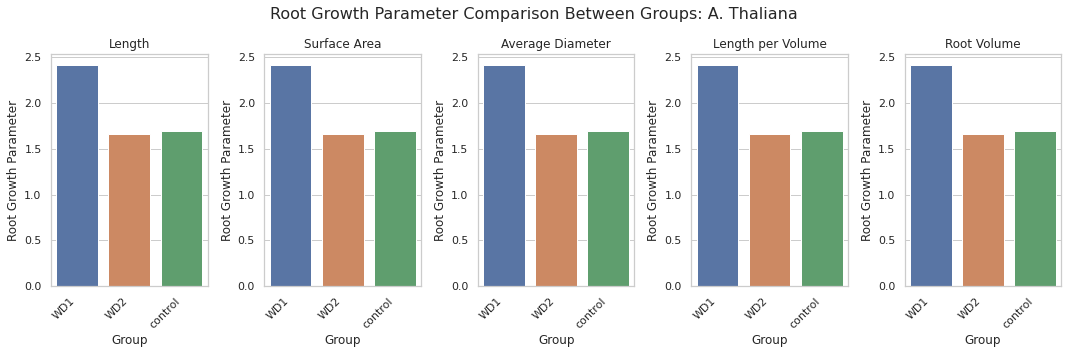

In [106]:
# set style
sns.set(style='whitegrid')

# create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

# loop over columns and plot bar chart
for ax, col in zip(axes, group_mean2.columns):
    col_data2 = group_mean2[col]
    sns.barplot(x=col_data2.index, y=col_data, ax=ax, capsize=5)
    ax.set_title(col)
    ax.set_ylabel('Root Growth Parameter')
    ax.set_xticklabels(col_data.index, rotation=45, ha='right')

# set main title
plt.suptitle('Root Growth Parameter Comparison Between Groups: A. Thaliana', fontsize=16)

# adjust layout and padding
plt.tight_layout()
plt.subplots_adjust(top=0.85)

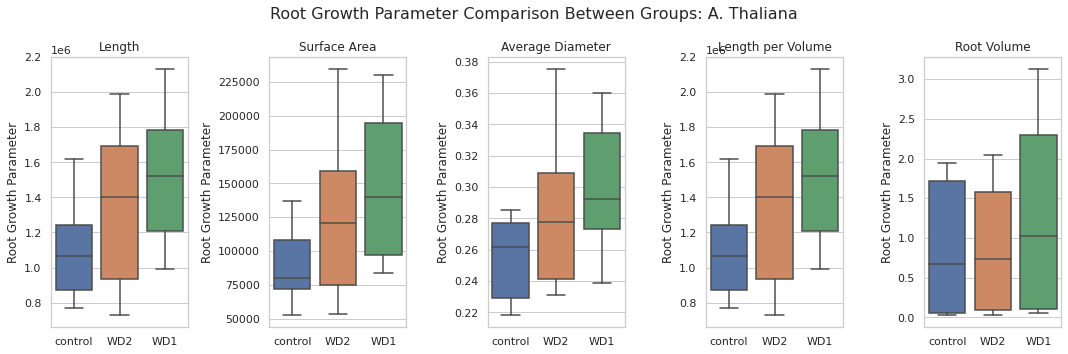

In [125]:
# compare the root parameters with subplot
sns.set(style='whitegrid')

# Create the boxplots for each parameter separated by groups
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
sns.boxplot(x='Group', y='Length', data=thaliana_df, ax=axes[0])
sns.boxplot(x='Group', y='Surface Area', data=thaliana_df, ax=axes[1])
sns.boxplot(x='Group', y='Average Diameter', data=thaliana_df, ax=axes[2])
sns.boxplot(x='Group', y='Length per Volume', data=thaliana_df, ax=axes[3])
sns.boxplot(x='Group', y='Root Volume', data=df, ax=axes[4])

# Set the titles and axis labels
titles = ['Length', 'Surface Area', 'Average Diameter', 'Length per Volume', 'Root Volume']
for ax, title in zip(axes, titles):
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Root Growth Parameter')

# Set the title for the whole plot
plt.suptitle('Root Growth Parameter Comparison Between Groups: A. Thaliana', fontsize=16)
# adjust layout and padding
plt.tight_layout()